In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

In [ ]:
data = load_iris()

In [ ]:
X = data['data']

In [ ]:
df = pd.DataFrame(X,columns=['x1','x2','x3','x4'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(df)

StandardScaler()

In [ ]:
df.describe()

,x1,x2,x3,x4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
Xs = pd.DataFrame(sc.transform(df),columns=df.columns)
Xs

,x1,x2,x3,x4
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [ ]:
Xs.describe()

,x1,x2,x3,x4
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [ ]:
pca = PCA()

In [ ]:
pca.fit(Xs)

PCA()

In [ ]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [ ]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['p%d'%(i+1) for i in range(4)])

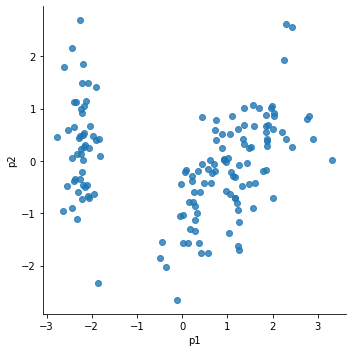

In [ ]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [ ]:
Xp['flor'] = data['target']

In [ ]:
Xp.head()

,p1,p2,p3,p4,flor
0,-2.264703,0.480027,-0.127706,-0.024168,0
1,-2.080961,-0.674134,-0.234609,-0.103007,0
2,-2.364229,-0.341908,0.044201,-0.028377,0
3,-2.299384,-0.597395,0.091290,0.065956,0
4,-2.389842,0.646835,0.015738,0.035923,0


In [ ]:
Xp.flor.value_counts()

2    50
1    50
0    50
Name: flor, dtype: int64

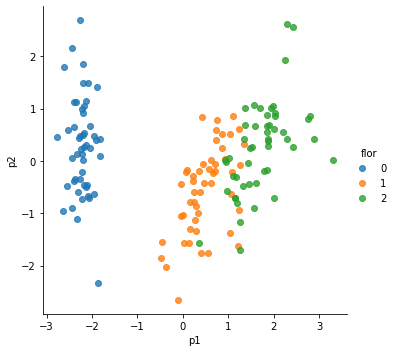

In [ ]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='flor')

In [ ]:
Xp.corr()

,p1,p2,p3,p4,flor
p1,1.000000e+00,5.506696e-16,3.166636e-17,-5.297991e-16,0.944665
p2,5.506696e-16,1.000000e+00,-2.377370e-16,-2.650942e-15,-0.011822
p3,3.166636e-17,-2.377370e-16,1.000000e+00,7.265691e-16,0.193748
p4,-5.297991e-16,-2.650942e-15,7.265691e-16,1.000000e+00,0.017987
flor,9.446652e-01,-1.182168e-02,1.937481e-01,1.798748e-02,1.000000
